<a href="https://colab.research.google.com/github/Thiraput01/My_ML_learning/blob/main/random_models/Iris_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
# load datasets from sklearn's iris datasets
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [50]:
iris_df = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'X3': X[:, 2],
    'X4': X[:, 3],
    'y': y
})
iris_df.sample(5)

,X1,X2,X3,X4,y
107,7.3,2.9,6.3,1.8,2
45,4.8,3.0,1.4,0.3,0
48,5.3,3.7,1.5,0.2,0
98,5.1,2.5,3.0,1.1,1
73,6.1,2.8,4.7,1.2,1


In [11]:
iris_df['y'].value_counts()

,count
y,
0,50
1,50
2,50


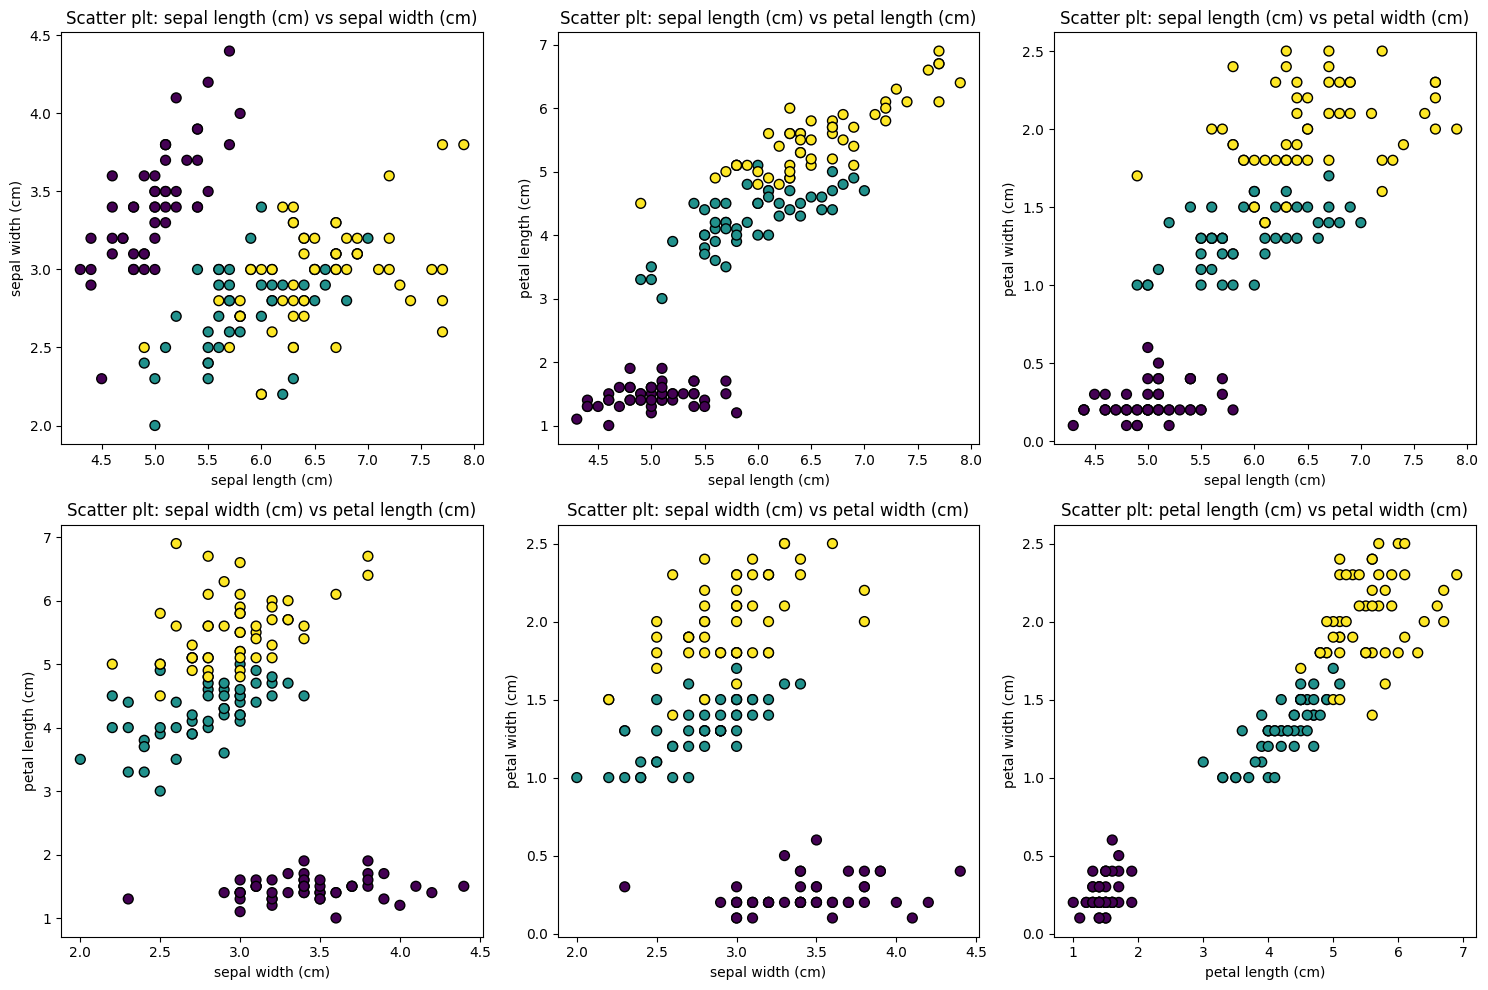

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

combi = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for ax, features in zip(axes.flatten(), combi):
    f1, f2 = features
    ax.scatter(X[:, f1], X[:, f2], c=y, cmap='viridis', edgecolors='k', s=50)
    ax.set_xlabel(iris.feature_names[f1])
    ax.set_ylabel(iris.feature_names[f2])
    ax.set_title(f'Scatter plt: {iris.feature_names[f1]} vs {iris.feature_names[f2]}')

plt.tight_layout()
plt.show()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(array([[4.6, 3.6, 1. , 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [6.7, 3.1, 4.4, 1.4],
        [4.8, 3.4, 1.6, 0.2],
        [4.4, 3.2, 1.3, 0.2]]),
 array([0, 0, 1, 0, 0]))

In [52]:
X_before = X_train.copy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

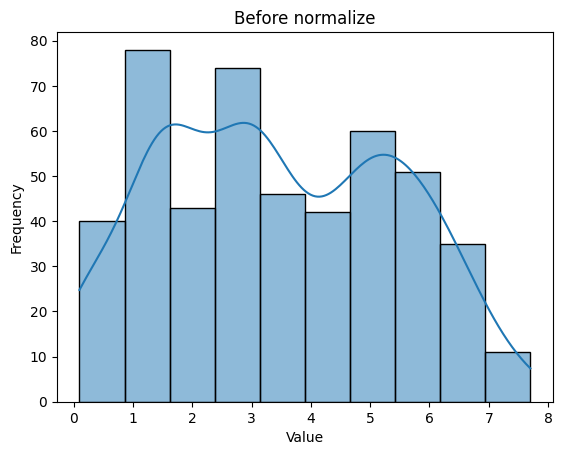

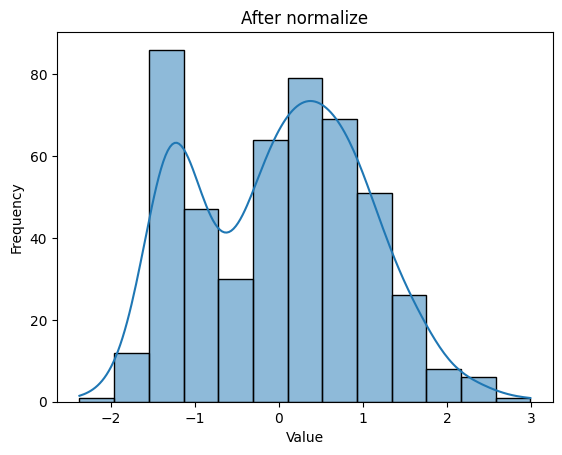

In [53]:
import seaborn as sns

data1 = X_before
data2 = X_train

flattened_data1 = data1.flatten()
falttened_data2 = data2.flatten()

sns.histplot(flattened_data1, kde=True)
plt.title('Before normalize')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


sns.histplot(falttened_data2, kde=True)
plt.title('After normalize')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [54]:
# convert to tensor before going in model
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)

y_train = torch.tensor(y_train, dtype=torch.int64).to(device)
y_test = torch.tensor(y_test, dtype=torch.int64).to(device)

In [62]:
class IrisClassifier(nn.Module):

  def __init__(self, input_size, output_size, hidden_size=120):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size//12)
    self.out = nn.Linear(hidden_size//12, output_size)

  def forward(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    y = self.out(x)
    return x

In [63]:
in_features = X_train.shape[1]
out_features = len(iris.target_names)
in_features, out_features

(4, 3)

In [64]:
model = IrisClassifier(in_features, out_features).to(device)

crierion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [65]:
epochs = 1000

for epoch in range(epochs):

  # forward
  out = model(X_train)
  loss = crierion(out, y_train)

  # predicted
  _, pred = torch.max(out, dim=1)
  correct = (pred == y_train).sum().item()
  accuracy = correct / len(y_train)

  # backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Epoch: 100/1000, Loss: 0.4186, Accuracy: 0.8833
Epoch: 200/1000, Loss: 0.2814, Accuracy: 0.9417
Epoch: 300/1000, Loss: 0.2205, Accuracy: 0.9417
Epoch: 400/1000, Loss: 0.1856, Accuracy: 0.9500
Epoch: 500/1000, Loss: 0.1627, Accuracy: 0.9667
Epoch: 600/1000, Loss: 0.1464, Accuracy: 0.9667
Epoch: 700/1000, Loss: 0.1341, Accuracy: 0.9667
Epoch: 800/1000, Loss: 0.1246, Accuracy: 0.9667
Epoch: 900/1000, Loss: 0.1169, Accuracy: 0.9667
Epoch: 1000/1000, Loss: 0.1106, Accuracy: 0.9667


In [66]:
# test on testset
model.eval()

with torch.no_grad():
  out = model(X_test)
  _, pred = torch.max(out, dim=1)

  accuracy = accuracy_score(y_test, pred.numpy())

  pred_tensor = pred.clone().detach()
  loss = crierion(out, y_test)

  print(f'loss: {loss.item():.4f}')
  print(f'accuracy: {accuracy:.4f}')

loss: 0.0880
accuracy: 1.0000
